In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(100)

class Layer:
    def __init__(self, n_input, n_neurons, activation=None, weights=None, bias=None):
        self.weights = weights if weights is not None else np.random.randn(n_input, n_neurons)
        self.activation = activation
        self.bias = bias if bias is not None else np.random.randn(n_neurons)
        self.last_activation = None
        self.error = None
        self.delta = None

    def activate(self, x):
        r = np.dot(x, self.weights) + self.bias
        self.last_activation = self._apply_activation(r)
        return self.last_activation

    def _apply_activation(self, r):
        if self.activation is None:
            return r
        if self.activation == 'tanh':
            return np.tanh(r)
        if self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-r))
        return r

    def apply_activation_derivative(self, r):
        if self.activation is None:
            return r
        if self.activation == 'tanh':
            return 1 - r ** 2
        if self.activation == 'sigmoid':
            return r * (1 - r)
        return r


class NeuralNetwork:
    def __init__(self):
        self._layers = []

    def add_layer(self, layer):
        self._layers.append(layer)

    def feed_forward(self, X):
        for layer in self._layers:
            X = layer.activate(X)
        return X

    def predict(self, X):
        ff = self.feed_forward(X)
        return ff
        """
        # One row
        if ff.ndim == 1:
            return np.argmax(ff)
        # Multiple rows
        return np.argmax(ff, axis=1)

        """
        
    def backpropagation(self, X, y, learning_rate):
        output = self.feed_forward(X)
        for i in reversed(range(len(self._layers))):
            layer = self._layers[i]
            if layer == self._layers[-1]:
                layer.error = y - output
                layer.delta = layer.error * layer.apply_activation_derivative(output)
            else:
                next_layer = self._layers[i + 1]
                layer.error = np.dot(next_layer.weights, next_layer.delta)
                layer.delta = layer.error * layer.apply_activation_derivative(layer.last_activation)
        for i in range(len(self._layers)):
            layer = self._layers[i]
            input_to_use = np.atleast_2d(X if i == 0 else self._layers[i - 1].last_activation)
            layer.weights += layer.delta * input_to_use.T * learning_rate

    def train(self, X, y, learning_rate, max_epochs):
        mses = []
        for i in range(max_epochs):
            temp_mses = []
            for j in range(len(X)):
                self.backpropagation(X[j], y[j], learning_rate)
                mse = np.mean(np.square(y - nn.feed_forward(X)))
                temp_mses.append(mse)
            mses.append(sum(temp_mses) / len(temp_mses))
            print('Epoch: #%s, MSE: %f' % (i+1, float(mse)))
        return mses

In [ ]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

In [ ]:
nn = NeuralNetwork()
nn.add_layer(Layer(2, 10, 'sigmoid'))
nn.add_layer(Layer(10, 1, 'sigmoid'))
errors = nn.train(X, y, 0.75, 500)

Epoch: #1, MSE: 0.443938
Epoch: #2, MSE: 0.426507
Epoch: #3, MSE: 0.399506
Epoch: #4, MSE: 0.359558
Epoch: #5, MSE: 0.311772
Epoch: #6, MSE: 0.272491
Epoch: #7, MSE: 0.250558
Epoch: #8, MSE: 0.241514
Epoch: #9, MSE: 0.238223
Epoch: #10, MSE: 0.236875
Epoch: #11, MSE: 0.236102
Epoch: #12, MSE: 0.235490
Epoch: #13, MSE: 0.234921
Epoch: #14, MSE: 0.234363
Epoch: #15, MSE: 0.233808
Epoch: #16, MSE: 0.233252
Epoch: #17, MSE: 0.232695
Epoch: #18, MSE: 0.232137
Epoch: #19, MSE: 0.231576
Epoch: #20, MSE: 0.231012
Epoch: #21, MSE: 0.230445
Epoch: #22, MSE: 0.229875
Epoch: #23, MSE: 0.229301
Epoch: #24, MSE: 0.228722
Epoch: #25, MSE: 0.228138
Epoch: #26, MSE: 0.227549
Epoch: #27, MSE: 0.226955
Epoch: #28, MSE: 0.226354
Epoch: #29, MSE: 0.225746
Epoch: #30, MSE: 0.225131
Epoch: #31, MSE: 0.224508
Epoch: #32, MSE: 0.223877
Epoch: #33, MSE: 0.223237
Epoch: #34, MSE: 0.222588
Epoch: #35, MSE: 0.221929
Epoch: #36, MSE: 0.221260
Epoch: #37, MSE: 0.220580
Epoch: #38, MSE: 0.219889
Epoch: #39, MSE: 0.21

In [ ]:
print("Predicted output train: \n" + str(nn.predict(X)))
print("Predicted output test: \n" + str(nn.predict([[5, 100], [50, 40]])))

Predicted output train: 
[[0.08928686]
 [0.91045278]
 [0.91448303]
 [0.08595673]]
Predicted output test: 
[[0.92573658]
 [0.00750392]]


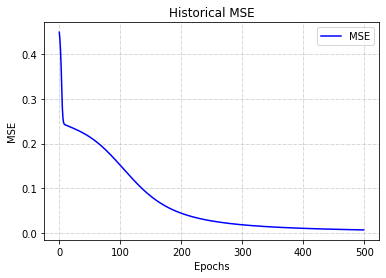

In [ ]:
plt.plot(errors, c = 'b', label = 'MSE')
plt.title('Historical MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.grid(linestyle='-.', linewidth=0.5)
plt.legend()
plt.show()